In [20]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [23]:
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [16]:
data = pd.read_csv('data/salaries.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52256 entries, 0 to 52255
Data columns (total 10 columns):
Unnamed: 0      52256 non-null int64
Unnamed: 0.1    52256 non-null int64
Agency          52256 non-null int64
AgencyTitle     52256 non-null object
EmployeeName    52256 non-null object
JobTitle        52256 non-null object
Salary2010      52256 non-null int64
Salary2011      52256 non-null int64
Salary2012      52256 non-null int64
Salary2013      52256 non-null int64
dtypes: int64(7), object(3)
memory usage: 4.4+ MB


* **Совсем "наивный" подход.**

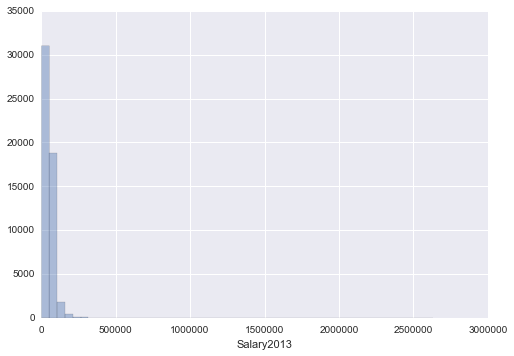

In [25]:
sns.distplot(data['Salary2013'], kde=False, rug=False)

In [21]:
(quantiles, values), (slope, intercept, r) = stats.probplot(data['Salary2013'], dist='norm')

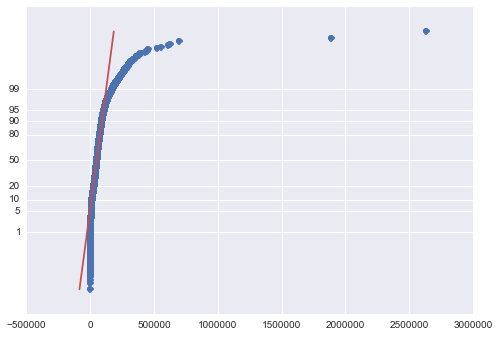

In [26]:
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan,ticks_perc)
plt.show()

* **Логичное преобразование - лог-нормальное распределение**

In [34]:
data['log_Salary2013'] = map(lambda x: np.log(x), data['Salary2013'])

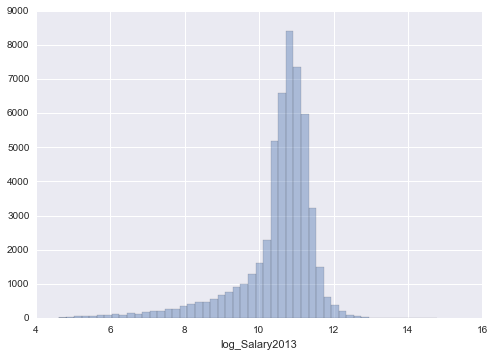

In [35]:
sns.distplot(data['log_Salary2013'], kde=False, rug=False)

In [36]:
(quantiles, values), (slope, intercept, r) = stats.probplot(data['log_Salary2013'], dist='norm')

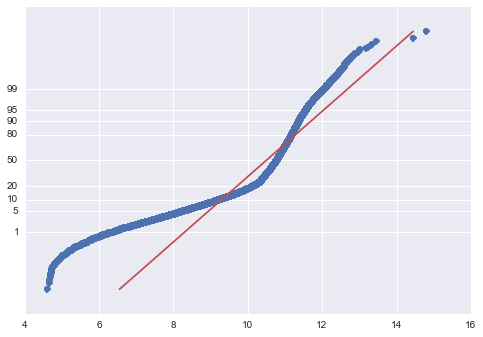

In [37]:
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan,ticks_perc)
plt.show()

Как вы считаете, можно ли считать эти данные нормальными?

In [38]:
data['log_Salary2013'].describe()

count    52256.000000
mean        10.496663
std          1.046595
min          4.615121
25%         10.330535
50%         10.759880
75%         11.091944
max         14.783878
Name: log_Salary2013, dtype: float64

** Простой способ понять являются ли данные "скошенными": **

* Если среднее больше, чем медиана, то данные скошенны вправо;
* Если среднее меньше, чем медиана, то данные скошенны влево.